In [1]:
# Loading and Normalizing the data

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


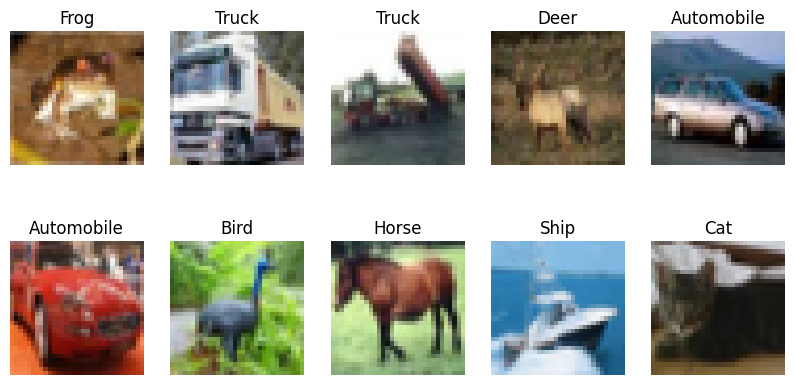

In [2]:
# Visualizing the data

# CIFAR-10 class labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Visualize first 10 images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [3]:
# We’ll use different configurations:
#  Model 1: ReLU + Adam + Random Initialization
#  Model 2: LeakyReLU + RMSprop + Xavier Initialization
#  Model 3: TanH + SGD + He Initialization

In [4]:
from keras.layers import LeakyReLU

def build_model(activation, optimizer, initializer):
    model = Sequential([
        Conv2D(32, (3,3), activation=activation, padding='same', kernel_initializer=initializer, input_shape=(32,32,3)),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation=activation, padding='same', kernel_initializer=initializer),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), activation=activation, padding='same', kernel_initializer=initializer),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(128, activation=activation, kernel_initializer=initializer),
        Dropout(0.2),
        Dense(64, activation=activation, kernel_initializer=initializer),
        Dropout(0.2),
        Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Different configurations
model_relu = build_model('relu', 'adam', 'random_normal')
model_leakyrelu = build_model(LeakyReLU(), 'rmsprop', 'glorot_uniform')
model_tanh = build_model('tanh', 'sgd', 'he_normal')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Training the three models
history_relu = model_relu.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)
history_leakyrelu = model_leakyrelu.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)
history_tanh = model_tanh.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 57ms/step - accuracy: 0.3934 - loss: 1.6962 - val_accuracy: 0.5183 - val_loss: 1.4252
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.6132 - loss: 1.1069 - val_accuracy: 0.6355 - val_loss: 1.0727
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6904 - loss: 0.8978 - val_accuracy: 0.6654 - val_loss: 0.9514
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.7353 - loss: 0.7728 - val_accuracy: 0.6515 - val_loss: 1.0594
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.7717 - loss: 0.6658 - val_accuracy: 0.7293 - val_loss: 0.7822
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.7967 - loss: 0.5835 - val_accuracy: 0.7443 - val_loss: 0.7737
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.8265 - loss: 0.5065 - val_accuracy: 0.7134 - val_loss: 0.8861
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.8446 -

In [6]:
# Graphs for ReLU Model

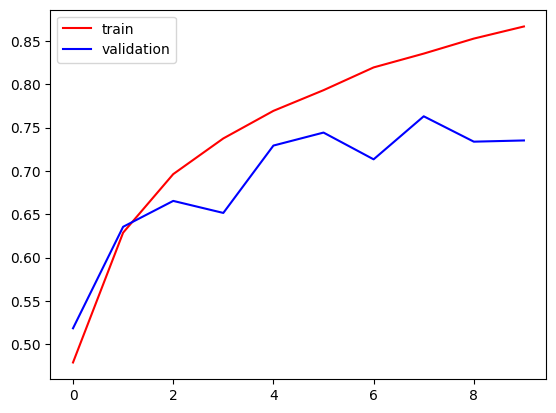

In [7]:
# Plotting accuracies
import matplotlib.pyplot as plt
plt.plot(history_relu.history['accuracy'],color='red',label='train')
plt.plot(history_relu.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

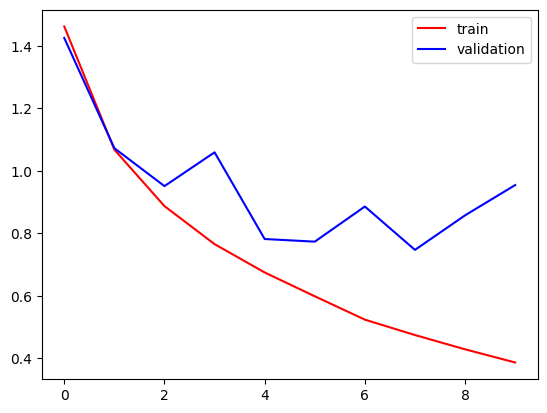

In [8]:
# Plotting losses wrt to epochs
plt.plot(history_relu.history['loss'],color='red',label='train')
plt.plot(history_relu.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [9]:
# Graphs for LeakyReLU Model

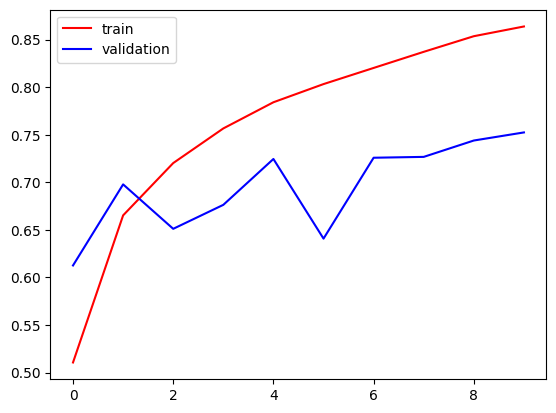

In [10]:
# Plotting accuracies
import matplotlib.pyplot as plt
plt.plot(history_leakyrelu.history['accuracy'],color='red',label='train')
plt.plot(history_leakyrelu.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

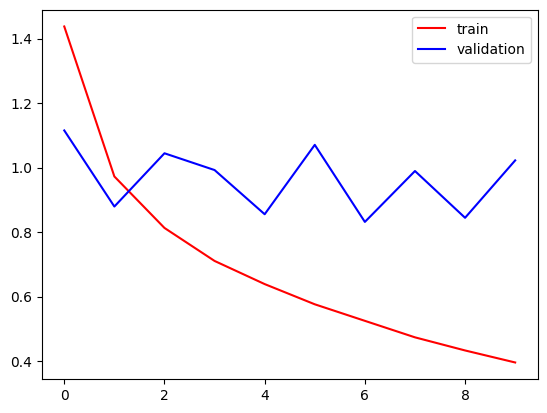

In [11]:
# Plotting losses wrt to epochs
plt.plot(history_leakyrelu.history['loss'],color='red',label='train')
plt.plot(history_leakyrelu.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
# Graphs for TanH Model

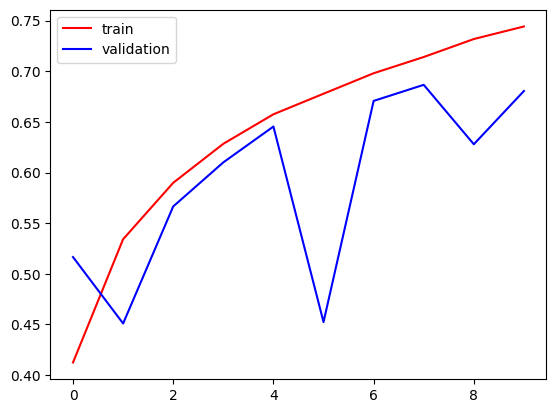

In [13]:
# Plotting accuracies
import matplotlib.pyplot as plt
plt.plot(history_tanh.history['accuracy'],color='red',label='train')
plt.plot(history_tanh.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

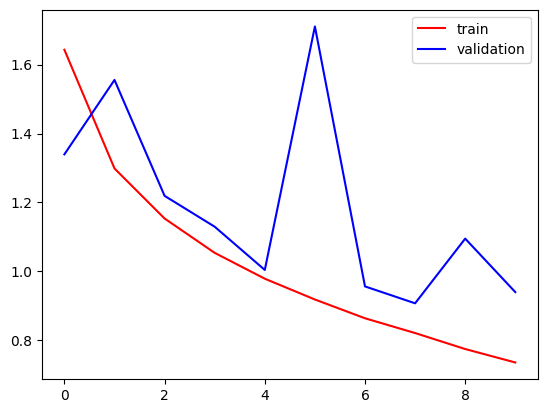

In [14]:
# Plotting losses wrt to epochs
plt.plot(history_tanh.history['loss'],color='red',label='train')
plt.plot(history_tanh.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
# So here we have created 3 models

# Model 1 : ReLU Activation, Random Initalization and Adam Optimizer
# Training Accuracy : 87.61%
# Validation Accuracy : 73.47%


# Model 2 : LeakyReLU Activation, RMSProp Initalization and Xavier Optimizer
# Training Accuracy : 86.89%
# Validation Accuracy : 75.70%

# Model 3 : TanH Activation, He Initalization and SGD Optimizer
# Training Accuracy : 75.51%
# Validation Accuracy : 69.22%


# Saving the weights of the best model
model_leakyrelu.save_weights('/content/best_model_cifar.weights.h5')

In [16]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import Adam

# Residual Block for ResNet
def residual_block(x, filters, stride=1):
    # Save the input to add later
    shortcut = x

    # Main path (convolutional layers)
    x = Conv2D(filters, kernel_size=3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    if stride != 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add the shortcut to the main path
    x = Add()([x, shortcut])
    x = ReLU()(x)

    return x

# ResNet-18 Architecture
def resnet_18(input_shape=(32, 32, 3), num_classes=10):
    inputs = Input(shape=input_shape)
    
    # Initial Convolution Layer
    x = Conv2D(64, (3, 3), strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Residual Blocks
    x = residual_block(x, 64, stride=1)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 512, stride=2)
    
    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)
    
    # Fully Connected Layer
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    # Create Model
    model = Model(inputs, outputs)
    
    return model

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define ResNet-18 model
model_resnet = resnet_18()

# Compile the model
model_resnet.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1285s 816ms/step - accuracy: 0.3159 - loss: 1.8578 - val_accuracy: 0.4979 - val_loss: 1.4363
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1243s 792ms/step - accuracy: 0.5793 - loss: 1.1987 - val_accuracy: 0.6551 - val_loss: 0.9656
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1247s 798ms/step - accuracy: 0.6754 - loss: 0.9373 - val_accuracy: 0.6316 - val_loss: 1.0896
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1226s 784ms/step - accuracy: 0.7462 - loss: 0.7628 - val_accuracy: 0.7065 - val_loss: 0.8666
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1241s 794ms/step - accuracy: 0.7975 - loss: 0.6187 - val_accuracy: 0.6566 - val_loss: 1.0414
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1204s 770ms/step - accuracy: 0.8320 - loss: 0.5160 - val_accuracy: 0.7497 - val_loss: 0.7625
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1232s 788ms/step - accuracy: 0.8655 - loss: 0.4101 - val_accuracy: 0.7845 - val_loss: 0.6483
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1252s 801ms/s

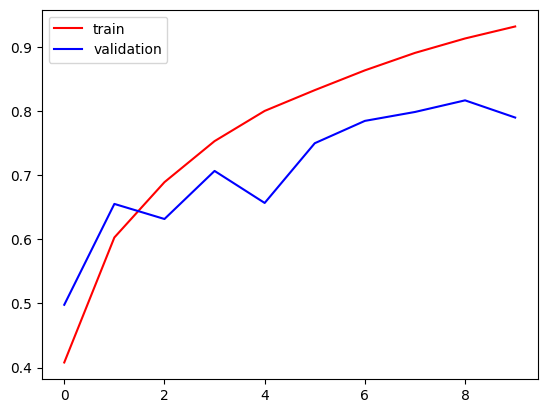

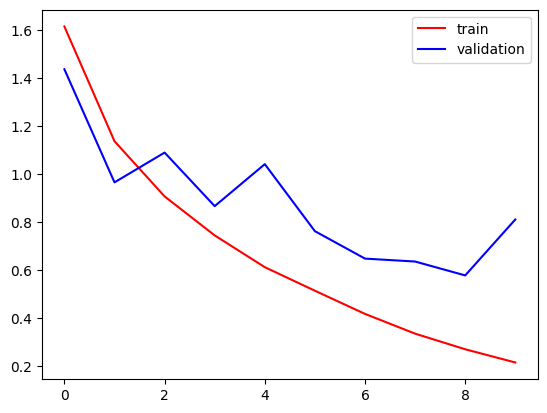

In [17]:
# Plot the accuracy graphs
import matplotlib.pyplot as plt

plt.plot(history_resnet.history['accuracy'], color='red', label='train')
plt.plot(history_resnet.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

# Plot the loss graphs
plt.plot(history_resnet.history['loss'], color='red', label='train')
plt.plot(history_resnet.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

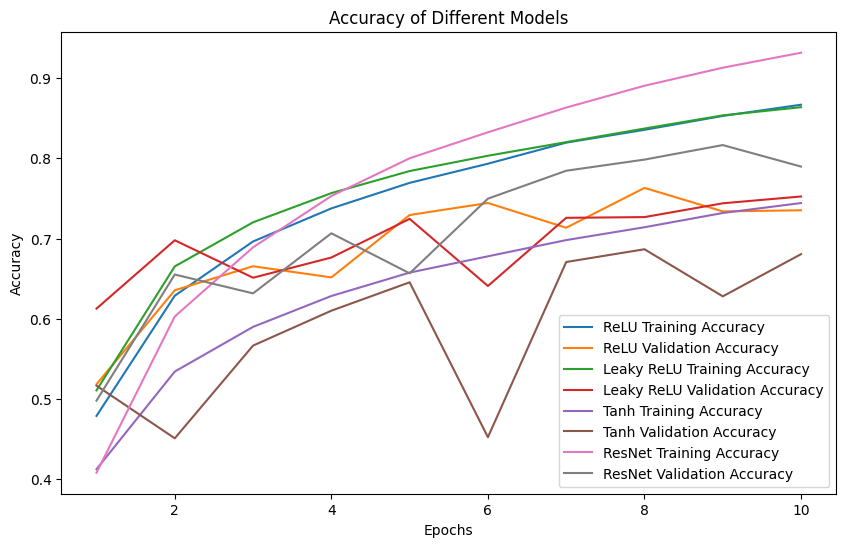

In [18]:
# Plotting Graphs
import matplotlib.pyplot as plt

# Extracting the accuracy data
acc_relu = history_relu.history['accuracy']
val_acc_relu = history_relu.history['val_accuracy']

acc_leakyrelu = history_leakyrelu.history['accuracy']
val_acc_leakyrelu = history_leakyrelu.history['val_accuracy']

acc_tanh = history_tanh.history['accuracy']
val_acc_tanh = history_tanh.history['val_accuracy']

acc_resnet = history_resnet.history['accuracy']
val_acc_resnet = history_resnet.history['val_accuracy']

# Plotting the accuracy graphs
plt.figure(figsize=(10, 6))

# Plot for ReLU
plt.plot(range(1, 11), acc_relu, label='ReLU Training Accuracy')
plt.plot(range(1, 11), val_acc_relu, label='ReLU Validation Accuracy')

# Plot for Leaky ReLU
plt.plot(range(1, 11), acc_leakyrelu, label='Leaky ReLU Training Accuracy')
plt.plot(range(1, 11), val_acc_leakyrelu, label='Leaky ReLU Validation Accuracy')

# Plot for Tanh
plt.plot(range(1, 11), acc_tanh, label='Tanh Training Accuracy')
plt.plot(range(1, 11), val_acc_tanh, label='Tanh Validation Accuracy')

# Plot for ResNet
plt.plot(range(1, 11), acc_resnet, label='ResNet Training Accuracy')
plt.plot(range(1, 11), val_acc_resnet, label='ResNet Validation Accuracy')

# Labels and title
plt.title('Accuracy of Different Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()


In [19]:
# Saving the weights of the Cifar Model
model_resnet.save_weights('/content/resnet_model_cifar.weights.h5')